In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus = False)


In [17]:
import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)

In [8]:
df_fitness = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/FITNESS.csv", 
                encoding = 'euc-kr')
df_fitness.head()

NAME GENDER  AGE AGEGROUP  WEIGHT     OXY  RUNTIME  RUNPULSE  RSTPULSE  \
0   Donna     여성   42      40대   68.15  59.571     8.17       166        40   
1  Gracie     여성   38      30대   81.87  60.055     8.63       170        48   
2  Luanne     여성   43      40대   85.84  54.297     8.65       156        45   
3    Mimi     여성   50      50대   70.87  54.625     8.92       146        48   
4   Chris     남성   49      40대   81.42  49.156     8.95       180        44   

   MAXPULSE  
0       172  
1       186  
2       168  
3       155  
4       185

In [10]:
df_currency = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/환율.csv", 
                parse_dates = ["APPL_DATE"])
df_currency.head()

CURRENCY  APPL_DATE  STD_RATE  USD_CONV_DATE
0      CNY 2016-01-01    181.48         0.1541
1      JPY 2016-01-01    976.99         0.8294
2      USD 2016-01-01   1178.00         1.0000
3      CNY 2016-01-02    181.48         0.1541
4      JPY 2016-01-02    976.99         0.8294

In [ ]:
# bar chart
# 성별

<AxesSubplot:>

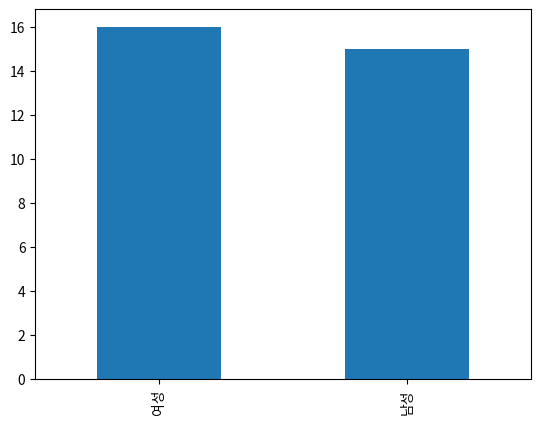

In [18]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<AxesSubplot:>

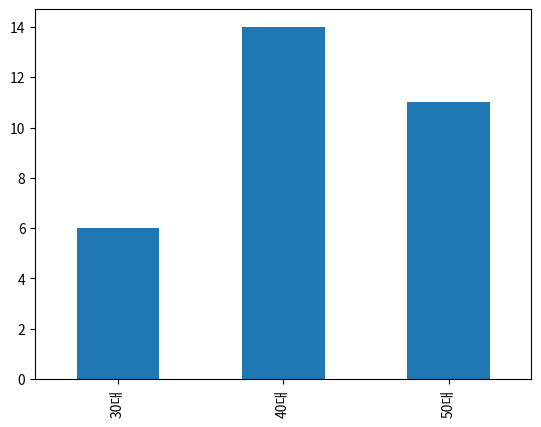

In [20]:
# 연령대
df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace = True);
#  sort 로 정렬해서 30대 부터 그래프에 표현되도록 함
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

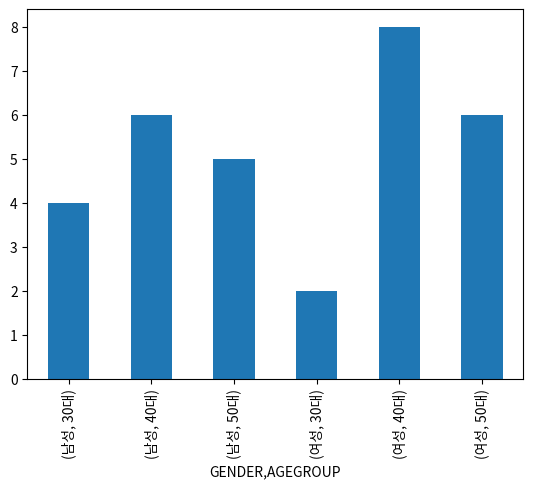

In [21]:
# groupby를 이용해서 표현 (성별 , 나이)
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
#  sort 없이 size로 정렬 可能
df_groupby_total.plot.bar()

In [ ]:
# histogram      .hist()

<AxesSubplot:>

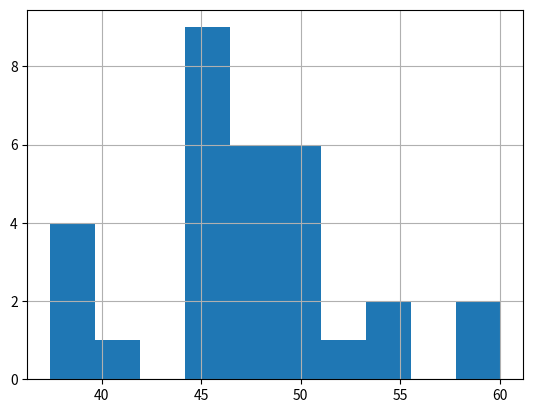

In [22]:
# 혈당 산소 요구량 oxy
df_fitness["OXY"].hist()

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

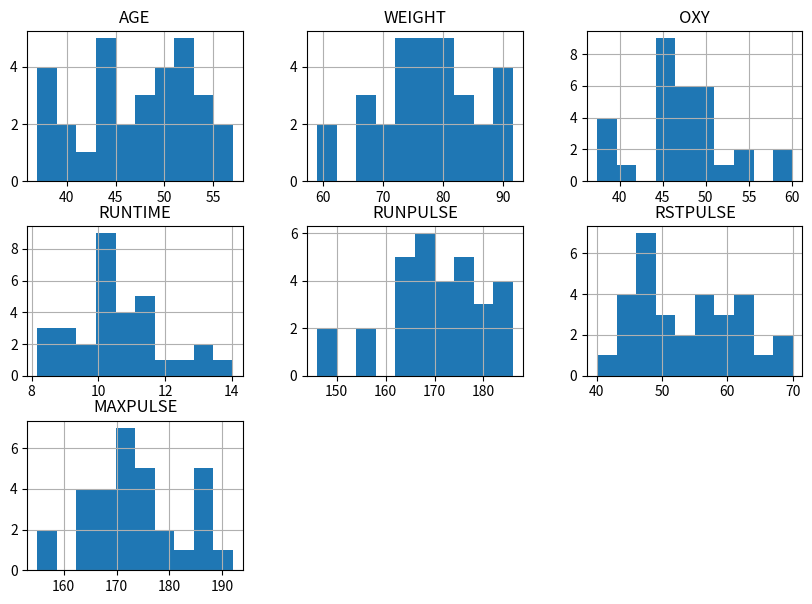

In [24]:
# 숫자형 변수
df_fitness.hist(figsize = (10,7))

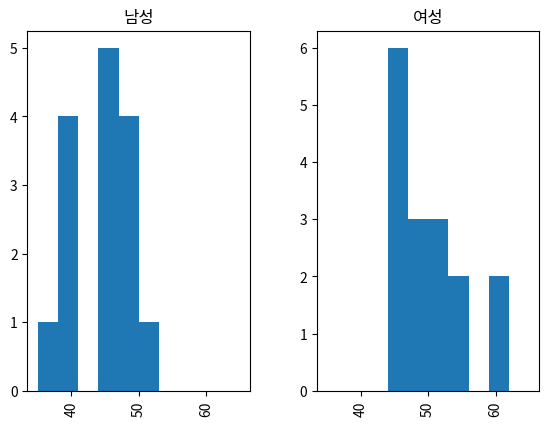

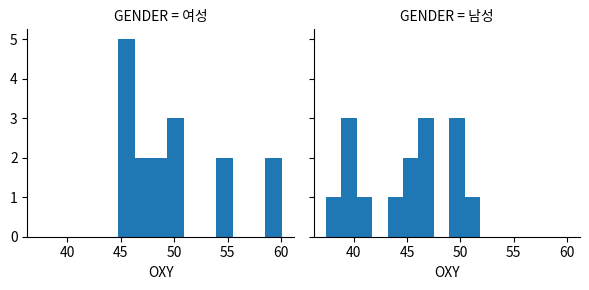

In [25]:
# 성별 혈당 산소 요구량
df_fitness.hist(column="OXY", by="GENDER", range=(35,65))
# range(최소, 최대) column~변수 , by~그룹변수
grid = sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist, "OXY")
#  map(함수, "문자형 column")

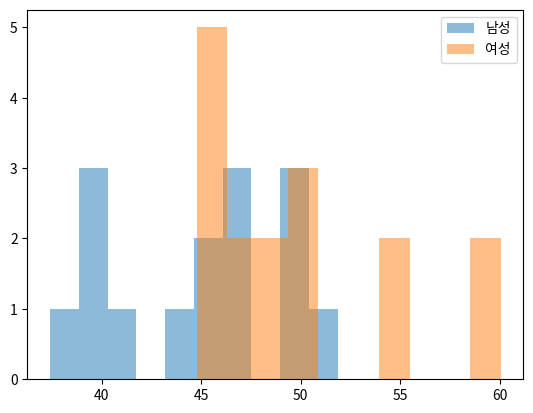

In [26]:
# 성별 혈당 산소 요구량 중첩
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"],label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"],label = "여성", alpha = 0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

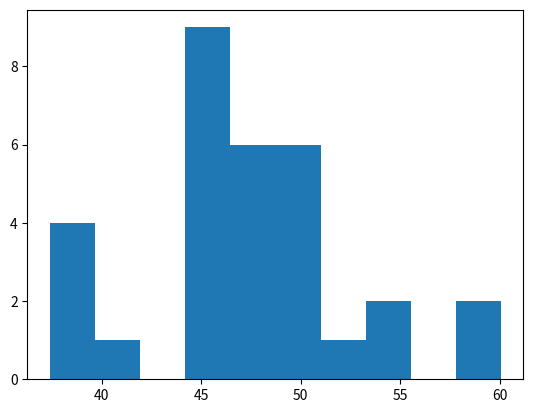

In [28]:
#  x축 구간bin 수 변경
plt.hist(x = "OXY", data = df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

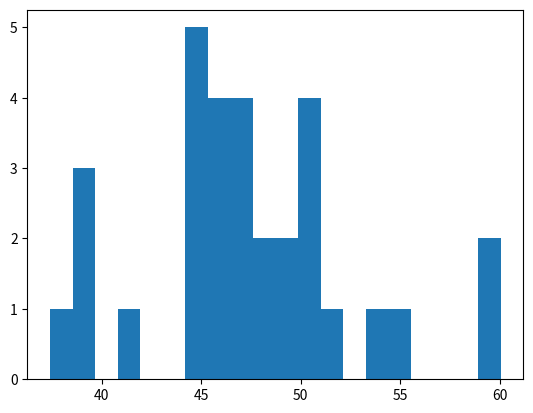

In [30]:
#  구간 조정 후 (bin 20)
plt.hist(x = "OXY", data=df_fitness, bins=20)

In [ ]:
# box plot

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

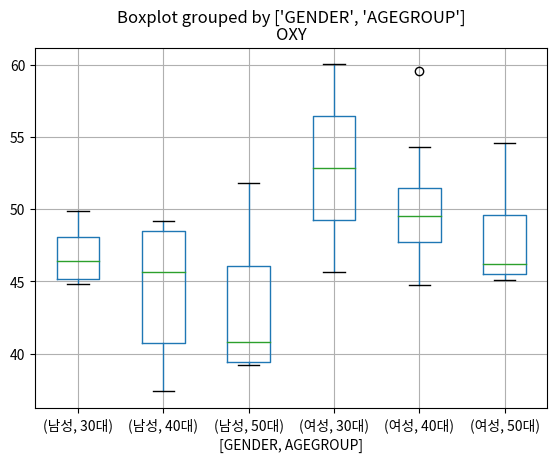

In [31]:
# 성별, 연령대, ~ 혈당 산소 요구량
df_fitness.boxplot(column = "OXY", by = ["GENDER", "AGEGROUP"])
# y~ column 변수   x~ by 변수

In [ ]:
# pie chart
# 변수 많으면 가독성이 떨어짐 6개 ↓


<AxesSubplot:ylabel='None'>

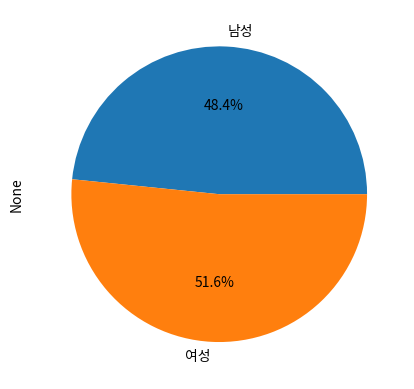

In [38]:
#  성별 pie chart
df_count = df_fitness.groupby(["GENDER"]).size()
#  groupby(기준 변수).size ~ size자료수
df_count.plot.pie(y = "OXY", autopct ="%.1f%%")

<AxesSubplot:ylabel='None'>

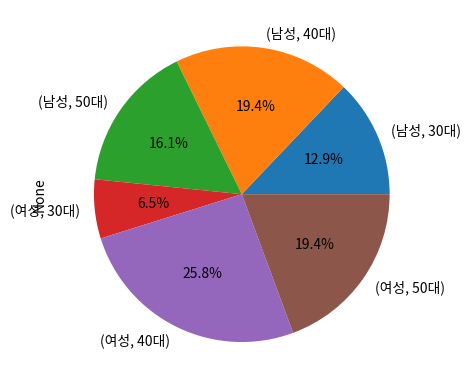

In [40]:
#  성별 + 연령대 pie chart
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

In [ ]:
# scatter plot (산점도)

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

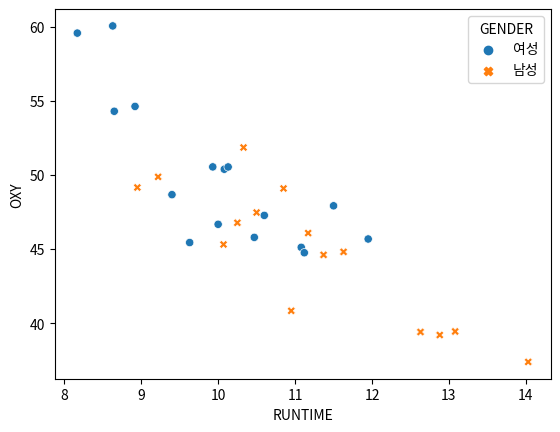

In [41]:
#  성별로 운동시간, 혈당 산소 요구량
sns.scatterplot(x="RUNTIME", y="OXY", hue = "GENDER", style="GENDER", data = df_fitness)

In [ ]:
# scatter matrix

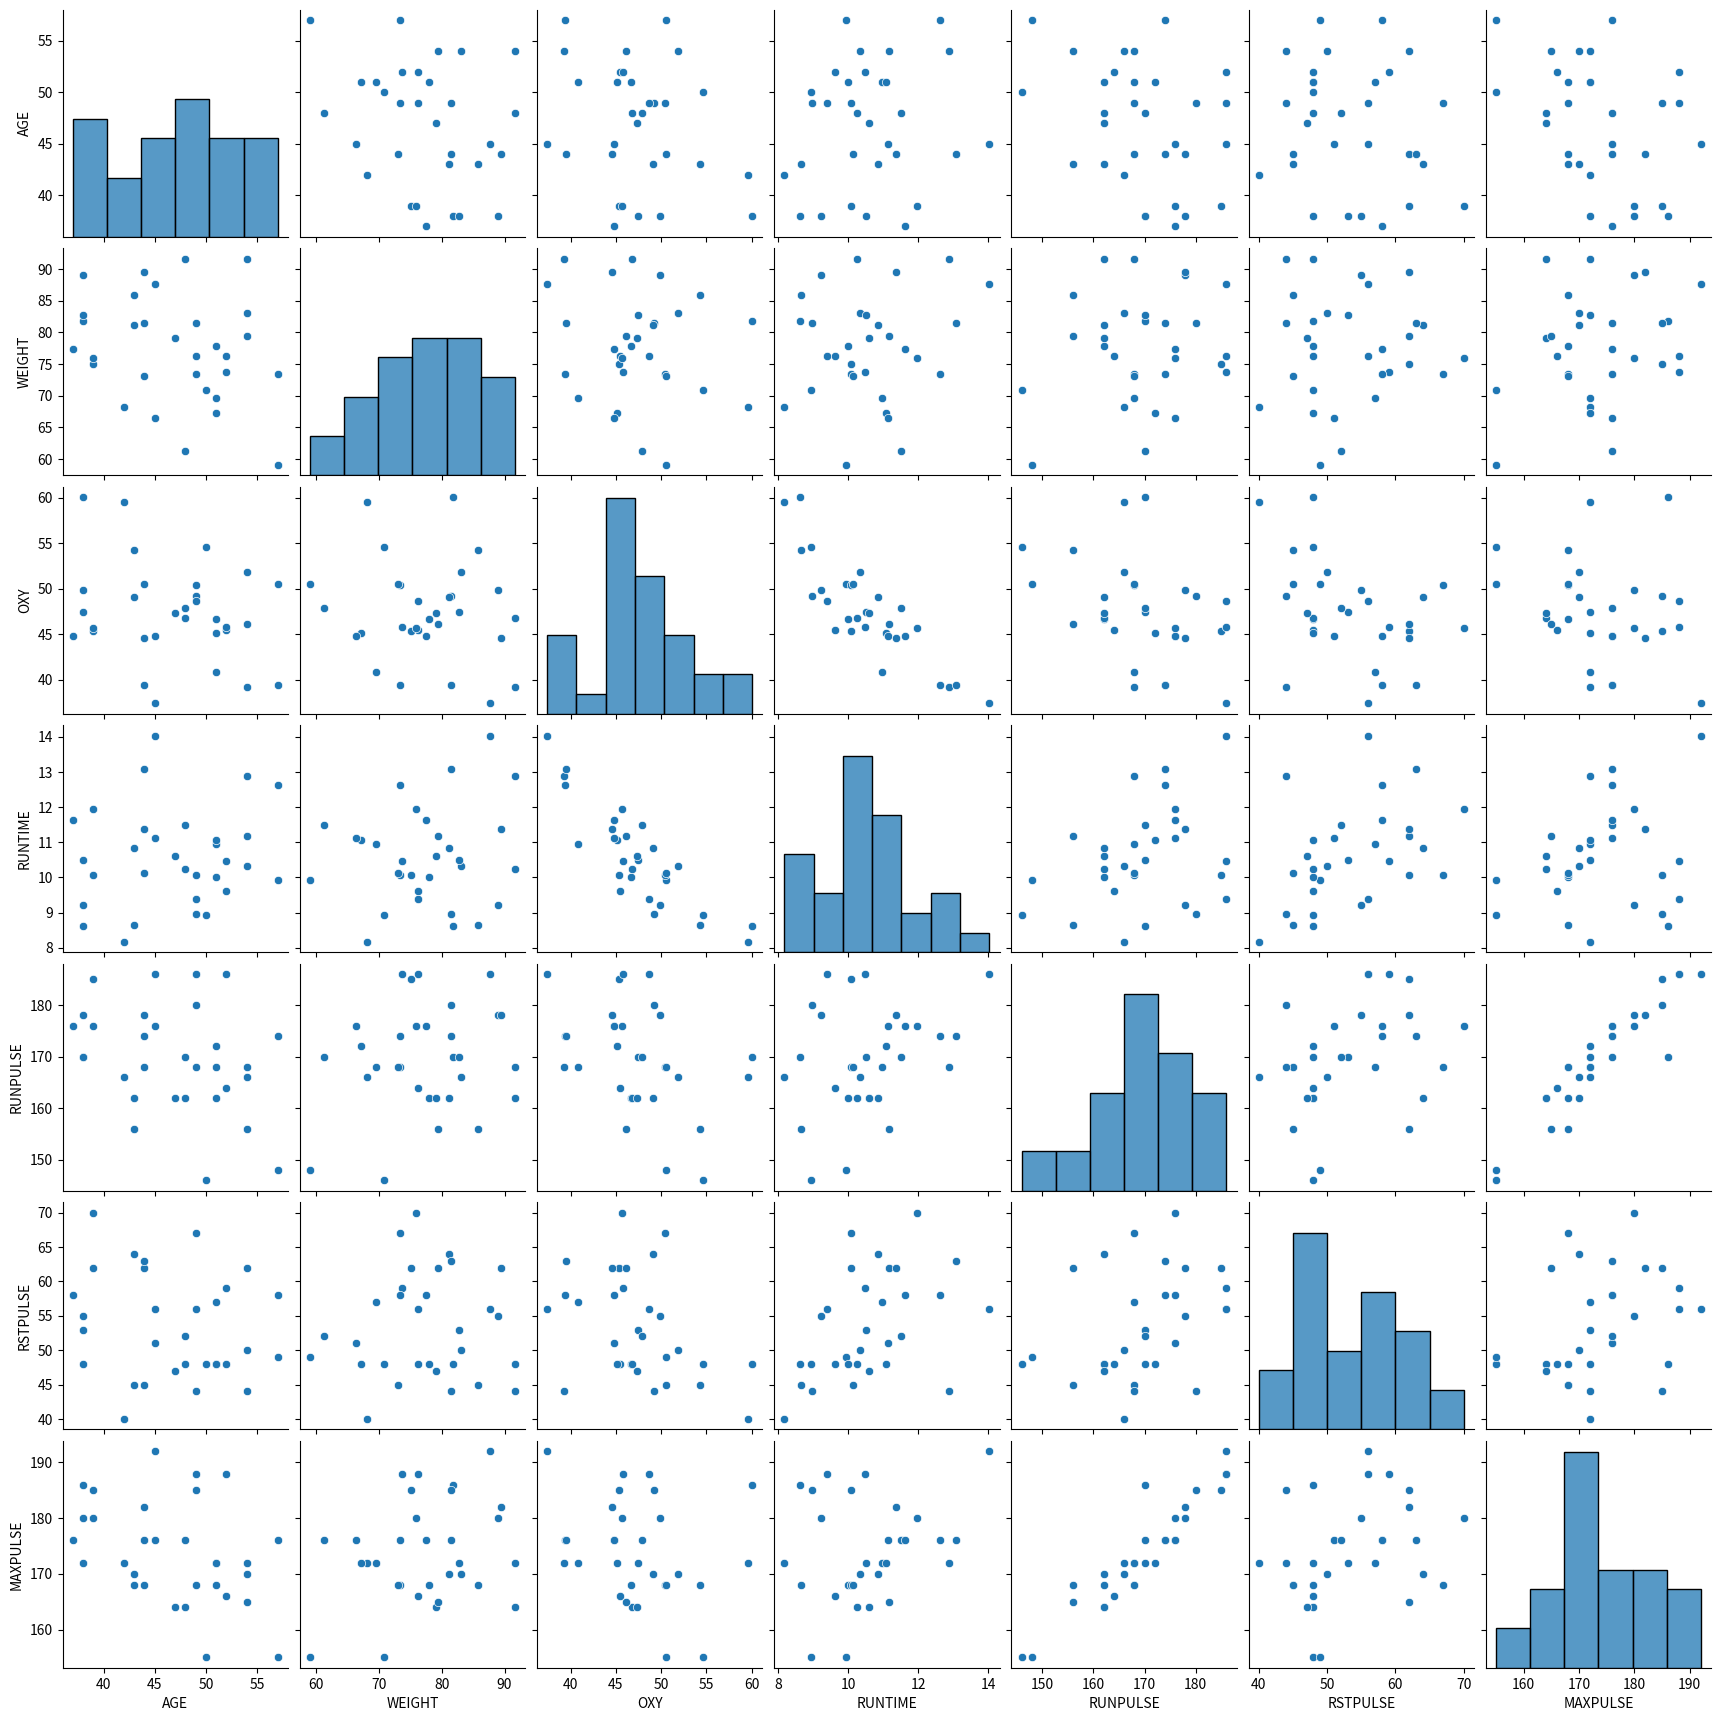

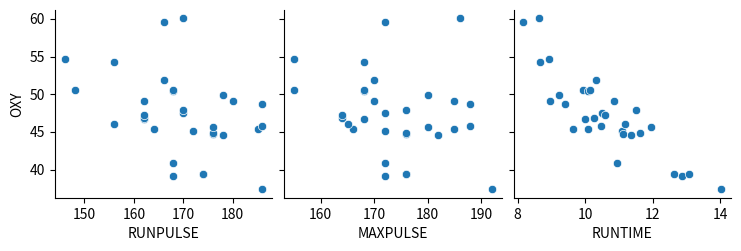

In [43]:
sns.pairplot(df_fitness)
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=["RUNPULSE", "MAXPULSE", "RUNTIME"])

In [ ]:
# Trend chart

In [46]:
# 통화별 매매기준률
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY       CNY     JPY     USD
APPL_DATE                         
2016-01-01  181.48  976.99  1178.0
2016-01-02  181.48  976.99  1178.0
2016-01-03  181.48  976.99  1178.0
2016-01-04  181.10  992.62  1184.0
2016-01-05  181.94  993.00  1185.0

<AxesSubplot:xlabel='APPL_DATE'>

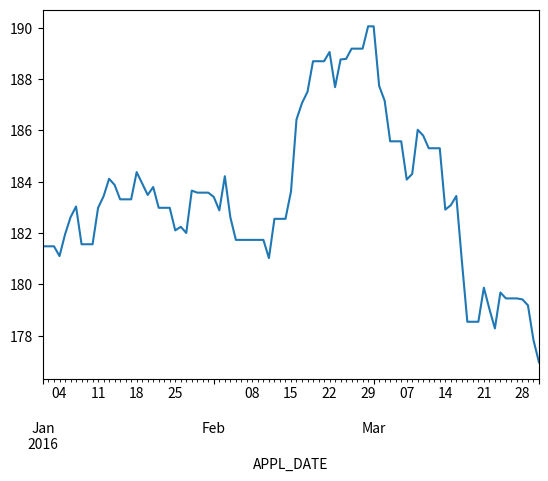

In [47]:
df_currency_pivot["CNY"].plot()

<AxesSubplot:xlabel='APPL_DATE'>

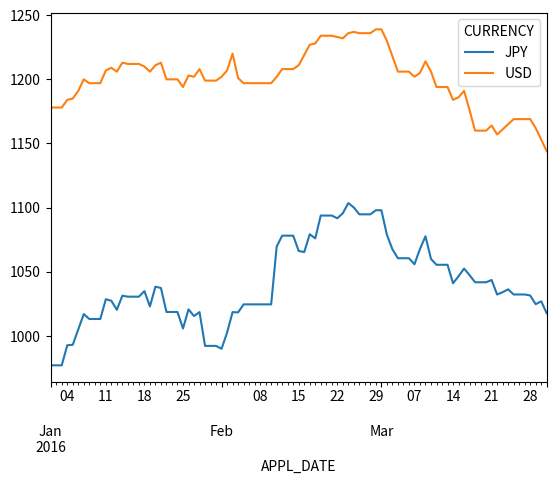

In [53]:
df_currency_pivot[["JPY", "USD"]].plot()

In [ ]:
# heatmap

In [54]:
# 성별 연령대 ~ 혈당 산소 요구량
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")

In [57]:
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
df_pivot

AGEGROUP       30대        40대        50대
GENDER                                  
남성        46.86625  44.410000  43.476200
여성        52.86800  50.427125  48.031833

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

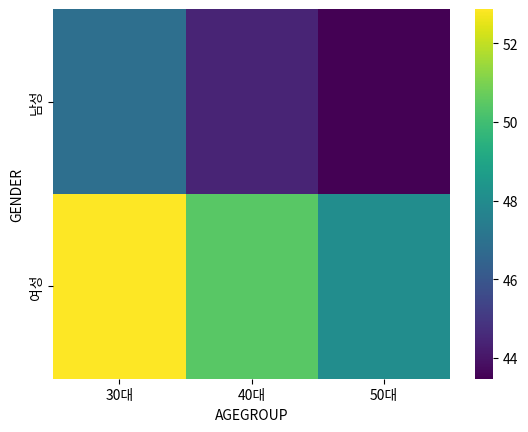

In [56]:
sns.heatmap(df_pivot, cmap="viridis")

In [ ]:
# contour plot 등고선

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

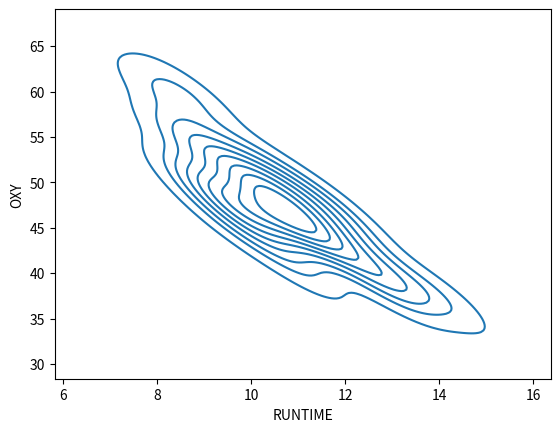

In [58]:
# 운동시간 혈당 산소 요구량
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

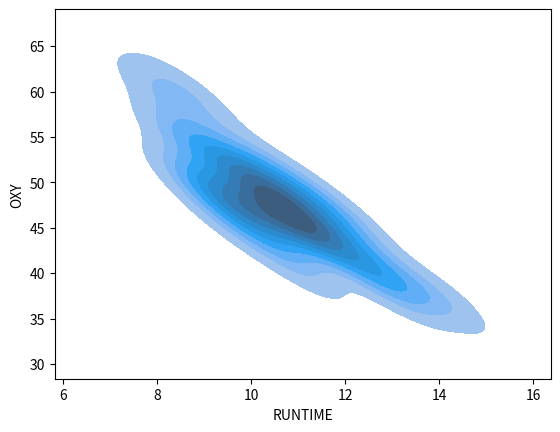

In [59]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = True)

In [ ]:
# parallel plot

<AxesSubplot:>

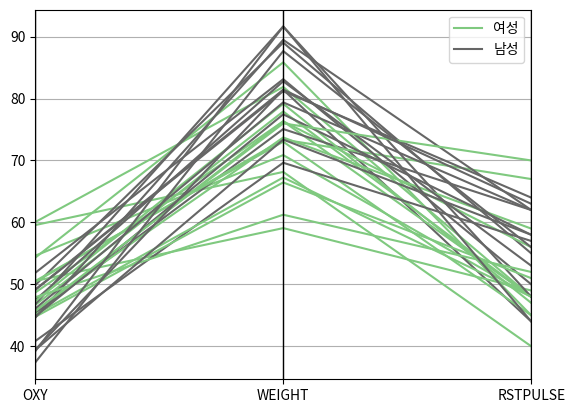

In [63]:
# 성별 ~ 혈당 산소 요구량, 몸무게, 휴식시 맥막수
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="Accent")

In [ ]:
#  customizing 그래프 커스터마이징

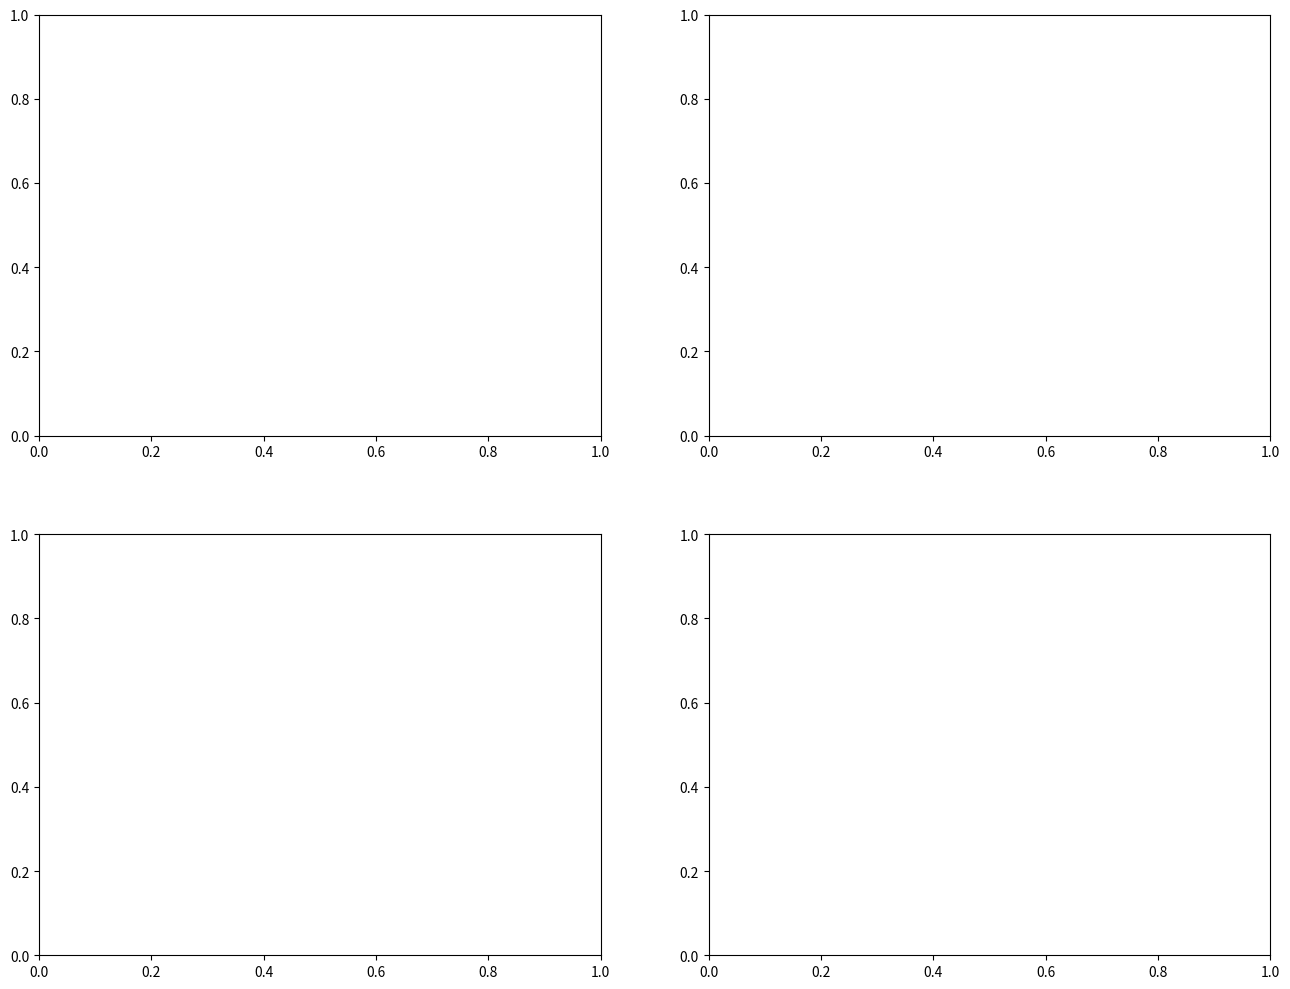

In [66]:
# dashboard 생성
df_count = df_fitness["AGEGROUP"].value_counts()
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)

In [65]:
#  히스토그램 histogram
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

Text(0.5, 524.1666666666666, '혈당 산소 요구량')

In [67]:
#  pie chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)

Text(0.5, 524.1666666666666, '연령대')

In [69]:
#  trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data = df_fitness, label = "맥박(운동)")
axes[1,0].plot("RUNTIME", "OXY", data = df_fitness, label = "혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize =15)
axes[1,0].set_xlabel("운동시간", fontsize =12)
axes[1,0].legend()

In [70]:
# scatter
axes[1,1].scatter("RUNPULSE", "OXY", data= df_fitness)
axes[1,1].set_title("Scatter", fontsize =15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=15)

Text(674.1666666666667, 0.5, '혈당 산소 요구량')

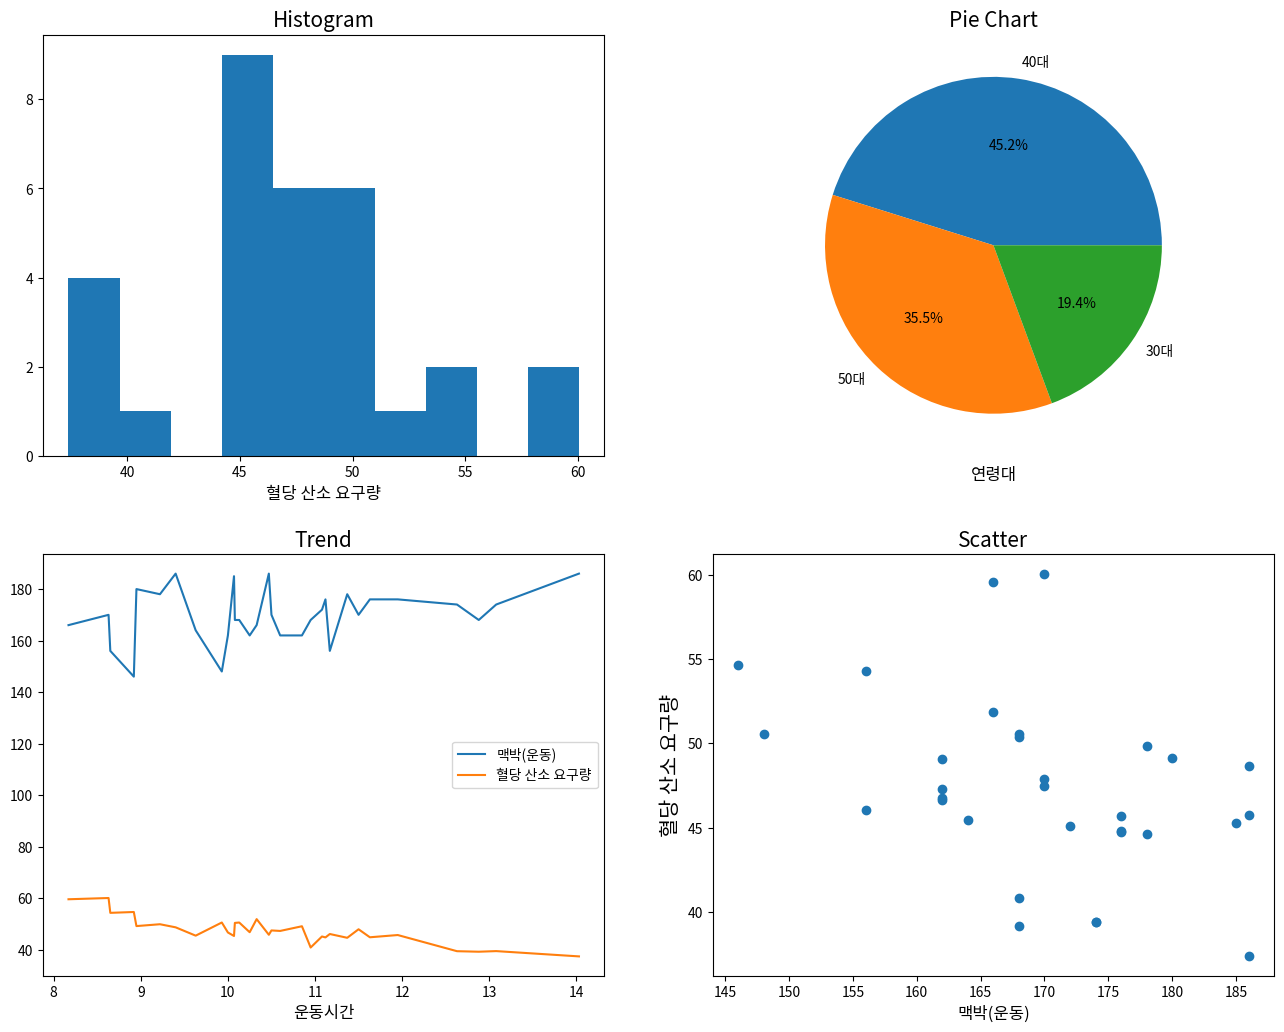

In [74]:
#  assemble 합치기
df_count = df_fitness["AGEGROUP"].value_counts()
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)
#  히스토그램 histogram
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)
#  pie chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)
#  trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data = df_fitness, label = "맥박(운동)")
axes[1,0].plot("RUNTIME", "OXY", data = df_fitness, label = "혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize =15)
axes[1,0].set_xlabel("운동시간", fontsize =12)
axes[1,0].legend()
# scatter
axes[1,1].scatter("RUNPULSE", "OXY", data= df_fitness)
axes[1,1].set_title("Scatter", fontsize =15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=15);